In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,avg, sum
import seaborn as sns
import matplotlib.pyplot as plt

# Create a spark Session
spark = SparkSession.builder \
    .appName("Amazon") \
    .getOrCreate()

csv_file_path = r"Dataset\Amazon.csv"
df = spark.read.csv(csv_file_path, header="true", inferSchema=True)


In [13]:
df_clean = (
    df
    .filter((col("Status").contains("Shipped")) & (col("Fulfilment")=="Amazon") & (col("Sales Channel ")=="Amazon.in"))           
            )
df_clean=df_clean.drop("fulfilled-by", "Unnamed: 22", " Sales Channel ", "promotion-ids")
df_clean= df_clean.dropna(subset=["Order ID", "Date", "Status", "Fulfilment", "Sales Channel ", "Qty", "Amount"])
df_clean.show()

+-----+-------------------+--------+-------+----------+--------------+------------------+--------+-----------------+-------------+----+----------+--------------+---+--------+------+---------------+-------------+----------------+------------+-----+
|index|           Order ID|    Date| Status|Fulfilment|Sales Channel |ship-service-level|   Style|              SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|      ship-city|   ship-state|ship-postal-code|ship-country|  B2B|
+-----+-------------------+--------+-------+----------+--------------+------------------+--------+-----------------+-------------+----+----------+--------------+---+--------+------+---------------+-------------+----------------+------------+-----+
|    2|404-0687676-7273146|04-30-22|Shipped|    Amazon|     Amazon.in|         Expedited| JNE3371|    JNE3371-KR-XL|        kurta|  XL|B07WV4JV4D|       Shipped|  1|     INR| 329.0|    NAVI MUMBAI|  MAHARASHTRA|        410210.0|          IN| true|
|    4|4

In [9]:
df_category=df.groupBy("Category").agg(
    avg("Amount").alias("avg_amount"),
    sum("Amount").alias("total_amount")
).orderBy("avg_amount", ascending=False)


In [10]:
df_category = df_category.toPandas()
df_category.set_index("Category")

,avg_amount,total_amount
Category,,
Set,833.385571,39204124.03
Saree,799.572645,123933.76
Western Dress,762.790580,11216072.69
Ethnic Dress,723.895389,791217.66
Top,526.098603,5347792.30
Blouse,520.327106,458408.18
kurta,455.927108,21299546.70
Bottom,358.733286,150667.98
Dupatta,305.000000,915.00


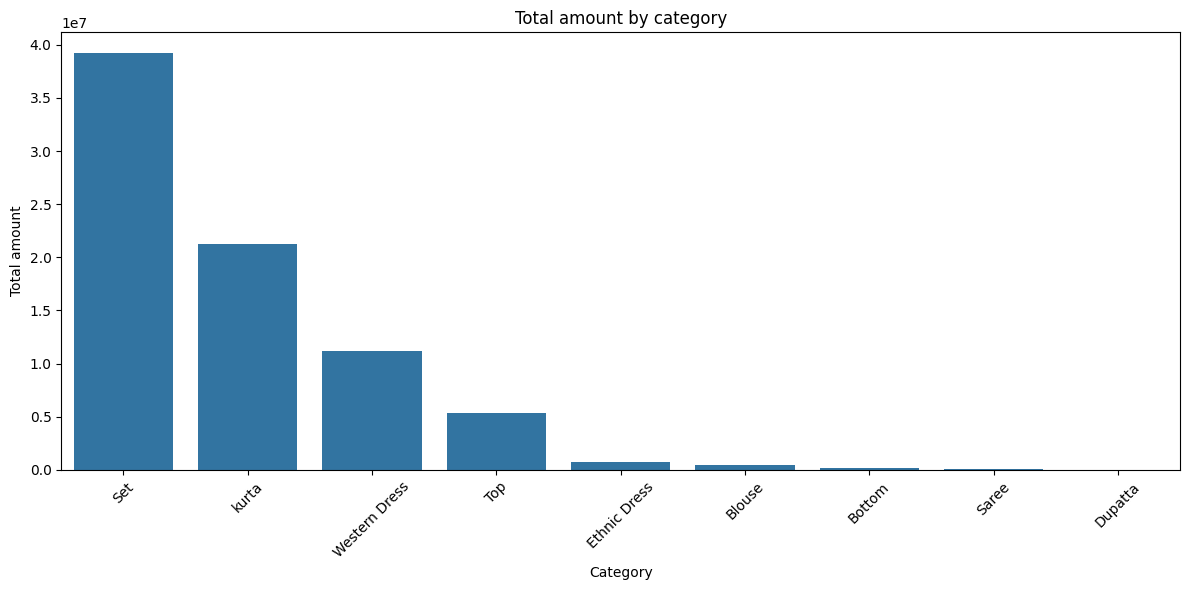

In [11]:
df_category_sorted = df_category.sort_values("total_amount", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_category_sorted, x="Category", y="total_amount")

plt.title("Total amount by category")
plt.xlabel("Category")
plt.ylabel("Total amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()